In [5]:
path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"

Fonctions pour nettoyer les datas

In [2]:
import pandas as pd
import numpy as np

In [3]:
from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

In [14]:
def upload_clean(data_path):
    """
    Download clean files in your data_path
    There has to be the dirty files in your data_path
    """
    df = file_to_dataframe(data_path + "Correspondances_Promos.csv",";")
    df_Correspondances_Promos = change_dates_all(df,['DEBVAL', 'FINVAL', 'DEBABOMIN', 'DEBABOMAX'])
    save_to_csv_file(df_Correspondances_Promos,data_path + "df_Correspondances_Promos.csv")

    for i in range(1, 4, 1):
        df = file_to_dataframe(data_path + f"Donnees_Promos_202{i}.csv",",")
        df_Donnees_Promos_202i = clean_dates(df)
        save_to_csv_file(df_Donnees_Promos_202i, data_path + f"df_Donnees_Promos_202{i}.csv")

        df = file_to_dataframe(data_path + f"Donnees_Reabos_202{i}.csv",",")
        df_Donnees_Reabos_202i = clean_dates(df)
        save_to_csv_file(df_Donnees_Reabos_202i,data_path + f"df_Donnees_Reabos_202{i}.csv")

    return

def concat_all_years(data_path):
    """
    Create new csv files that concats the 3 years at once.
    """
    for name in ["df_Donnees_Promos_202", "df_Donnees_Reabos_202"]:
        df1 = file_to_dataframe(data_path + name + "1.csv",",")
        df2 = file_to_dataframe(data_path + name + "2.csv",",")
        df3 = file_to_dataframe(data_path + name + "3.csv",",")

        df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

        df.to_csv(data_path + name[:-4] + ".csv", index = True)


    return

upload_clean(path_antoine)
concat_all_years(path_antoine)

Partie sur les ODD 

In [11]:
def creation_df_odd(data_path, data_path_results):
    """
    This function creates the new df_odd on your Computer where all the ODD are presented and classified with their type
    """

    df_Correspondances_Promos = file_to_dataframe(data_path + "df_Correspondances_Promos.csv",",") 

    df_odd = df_filter_condition(df_Correspondances_Promos,'TYPE_PROMO','ODD') #we create a DataFrame with only ODD Promotion
    df_odd['TYPE_PROMON'] = create_new_column(df_odd,apply_conditions) #we create new columns on this DataFrame of the ODD type


    for i in [1, 2, 3]:
    #creation df_odd_202i pour chaque année
        df_Donnees_Promos_202i = file_to_dataframe(data_path + f"df_Donnees_Promos_202{i}.csv",",")

        n = df_Donnees_Promos_202i.shape[0] / 10000 #number minimum of used
        df_new_odd = keep_used_odd(df_Donnees_Promos_202i,df_odd,n) #creation of the new tab by keeping only the used promos
        
        save_to_csv_file(df_new_odd,data_path_results + f"odd_202{i}.csv")
    
    #idem sur les trois années
    df_Donnees_Promos = file_to_dataframe(data_path + "df_Donnees_Promos.csv",",")

    n = df_Donnees_Promos.shape[0] / 10000 #number minimum of used
    df_new_odd = keep_used_odd(df_Donnees_Promos,df_odd,n) #creation of the new tab by keeping only the used promos
    
    save_to_csv_file(df_new_odd,data_path_results + f"odd.csv")

    return True


#Intermediary step we change the df_Données_Promos by adding a column 'TYPE_PROMON' for being easier to understand instead of 'CPROMO'

def create_df_Données_Promos_odd(data_path, data_path_results):


    for i in [1, 2, 3]:
        #année i
        df_Donnees_Promos_202i = file_to_dataframe(data_path + f"df_Donnees_Promos_202{i}.csv",",")
        df_odd = file_to_dataframe(data_path + f"odd_202{i}.csv", ",")
        df_Donnees_Promos_202i_odd = join_dataFrames(df_Donnees_Promos_202i,df_odd[['CPROMO','TYPE_PROMON']] ,'CPROMO') #We create a new column 'TYPE_PROMON' on df_Données_Promos_202i
        save_to_csv_file(df_Donnees_Promos_202i_odd,data_path_results + f"df_Donnees_Promos_202{i}_odd.csv") #we save it on your Mac

    return True

def create_df_Données_Promos_odd_all(data_path, data_path_results):
    """
    This function create df_Données_Promos_odd for the dataFrame with all years
    """
    
    df_Donnees_Promos = file_to_dataframe(data_path + "df_Donnees_Promos.csv",",")
    df_odd = file_to_dataframe(data_path + "odd.csv", ",")
    df_Donnees_Promos_odd = join_dataFrames(df_Donnees_Promos,df_odd[['CPROMO','TYPE_PROMON']] ,'CPROMO') #We create a new column 'TYPE_PROMON' on df_Données_Promos_202i
    save_to_csv_file(df_Donnees_Promos_odd,data_path_results + "df_Donnees_Promos_odd.csv") #we save it on your Mac
    
    return True

#Intermediary step we create df_Données_Réabos_odd where there are all the Reabos which corresponds to a reabo

def create_df_Données_Reabos_odd_all(data_path, data_path_results):
    """
    This function create df_Données_Reabos_odd with all years of Reabos which corresponds to a use of Promo
    and then we drop some unused column
    """
    df_Donnees_Promos_odd = file_to_dataframe(data_path +"df_Donnees_Promos_odd.csv" )
    df_Donnees_Reabos = file_to_dataframe(data_path + "df_Donnees_Reabos.csv")
    df_Donnees_Reabos_odd = join_dataFrames(df_Donnees_Promos_odd,df_Donnees_Reabos,['ID_ABONNE','DATE_ACTE_REEL'])

    df_Donnees_Reabos_odd = df_Donnees_Reabos_odd.drop(columns = ["REABO_APRES_ECHEANCE","CPROMO","SECTEUR","PAYS","NUMDIST_PARTENAIRE","NOM_PARTENAIRE","NUMDIST_POINT_DE_VENTE","NOM_POINT_DE_VENTE"])

    end_abo = 'DATE_FIN_ABO_PREC'
    date_reabo = 'DATE_ACTE_REEL'

    df_Donnees_Reabos_odd = time_reabo_columns(df_Donnees_Reabos_odd,end_abo,date_reabo)
    
    save_to_csv_file(df_Donnees_Reabos_odd,data_path_results + "df_Donnees_Reabos_odd.csv")

    return True

creation_df_odd(path_antoine,path_results_antoine)
create_df_Données_Promos_odd(path_antoine, path_results_antoine)
create_df_Données_Promos_odd_all(path_antoine,path_results_antoine)
create_df_Données_Reabos_odd_all(path_antoine,path_results_antoine)

Pourcentages

In [14]:
def repartition_reabo_cond(data_path, data_path_results, action = ['write']):
    """
    This function is used to provide some statistics on the reabo habits.
    action is a list of the actions we need to do.
    """

    df_Donnees_Promos_odd = file_to_dataframe(data_path + "df_Donnees_Promos_odd.csv") #We open the df_Données_Promos_2021_odd where TYPEPROMO <-> CPROMO
    df_Donnees_Reabos = file_to_dataframe(data_path + "df_Donnees_Reabos.csv")
    df_join = join_dataFrames(df_Donnees_Promos_odd,df_Donnees_Reabos,['ID_ABONNE','DATE_ACTE_REEL']) #We join the tables

    df_join = df_mois_annee(df_join,'DATE_ACTE_REEL')

    #We compute some statistcs using count_abo_conditions : this functions count the number of an occurence where the datas are group by conditions 
    df_repartition_promo = count_abo_conditions(df_join,['TYPE_PROMON'],'ID_ABONNE')
    df_type_promo_canaldistrib = count_abo_conditions(df_join,['TYPE_PROMON', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_month_canaldistrib = count_abo_conditions(df_join,['MONTH', 'YEAR', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_canaldistrib = count_abo_conditions(df_join,['TYPE_PROMON','MONTH', 'YEAR', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_region = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'REGION'],'ID_ABONNE')
    df_repartition_secteur = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'SECTEUR'],'ID_ABONNE')
    df_repartition_enseigne = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'ENSEIGNE'],'ID_ABONNE')
    df_repartition_moypay = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'MOYEN_PAIEMENT'],'ID_ABONNE')
    df_repartition_formule = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'FORMULE_PREC'],'ID_ABONNE')
    
    nouns = ["df_repartition_promo.csv", "type_promo_canaldistrib.csv", "month_canaldistrib.csv", "repartition_canaldistrib.csv", "repartition_region.csv", "repartition_secteur.csv", "repartition_enseigne.csv", "repartition_moypay.csv", "repartition_formule.csv"]
    with open(data_path_results + 'Files_names.txt', "w") as file:
        for element in nouns:
            file.write(f"{element}\n")

    if 'write' in action:
        save_to_csv_file(df_repartition_promo,data_path_results + "df_repartition_promo.csv")
        save_to_csv_file(df_type_promo_canaldistrib,data_path_results + "type_promo_canaldistrib.csv")
        save_to_csv_file(df_month_canaldistrib,data_path_results + "month_canaldistrib.csv")
        save_to_csv_file(df_repartition_canaldistrib,data_path_results + "repartition_canaldistrib.csv")
        save_to_csv_file(df_repartition_region,data_path_results + "repartition_region.csv")
        save_to_csv_file(df_repartition_secteur,data_path_results + "repartition_secteur.csv")
        save_to_csv_file(df_repartition_enseigne,data_path_results + "repartition_enseigne.csv")
        save_to_csv_file(df_repartition_moypay,data_path_results + "repartition_moypay.csv")
        save_to_csv_file(df_repartition_formule,data_path_results + "repartition_formule.csv")

    return True


In [15]:
repartition_reabo_cond(path_antoine, path_results_antoine, action = ['write'])

True

In [26]:
def stats_percentage_one_cond(data_path,data_path_results):
    
    #open_new df_données_Reabos_odd
    df_join = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")

    #We compute some statistcs using count_abo_conditions : this functions count the number of an occurence where the datas are group by conditions 
    df_repartition_promo = percent_abo_conditions(df_join,['TYPE_PROMON'],'ID_ABONNE')
    df_repartition_canaldistrib = percent_abo_conditions(df_join,['CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_region = percent_abo_conditions(df_join,['REGION'],'ID_ABONNE')
    df_repartition_enseigne = percent_abo_conditions(df_join,['ENSEIGNE'],'ID_ABONNE')
    df_repartition_moypay = percent_abo_conditions(df_join,['MOYEN_PAIEMENT'],'ID_ABONNE')
    df_repartition_formule = percent_abo_conditions(df_join,['FORMULE_PREC'],'ID_ABONNE')

    save_to_csv_file(df_repartition_promo,data_path_results + "repartition_promo_%.csv")
    save_to_csv_file(df_repartition_canaldistrib,data_path_results + "repartition_canaldistrib_%.csv")
    save_to_csv_file(df_repartition_region,data_path_results + "repartition_region_%.csv")
    save_to_csv_file(df_repartition_enseigne,data_path_results + "repartition_enseigne_%.csv")
    save_to_csv_file(df_repartition_moypay,data_path_results + "repartition_moypay_%.csv")
    save_to_csv_file(df_repartition_formule,data_path_results + "repartition_formule_%.csv")
    
    return True

In [17]:
stats_percentage_one_cond(path_antoine,path_results_antoine)

True

In [19]:
def stats_percentage_multiple_conds(data_path,data_path_results):
    
    #open_new df_données_Reabos_odd
    df_join = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")

    
    #We compute some statistcs using count_abo_conditions : this functions count the number of an occurence where the datas are group by conditions 
    df_repartition_canaldistrib = percent_abo_conditions_group(df_join,['TYPE_PROMON','CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_region = percent_abo_conditions_group(df_join,['TYPE_PROMON','REGION'],'ID_ABONNE')
    df_repartition_enseigne = percent_abo_conditions_group(df_join,['TYPE_PROMON','ENSEIGNE'],'ID_ABONNE')
    df_repartition_moypay = percent_abo_conditions_group(df_join,['TYPE_PROMON','MOYEN_PAIEMENT'],'ID_ABONNE')
    df_repartition_formule = percent_abo_conditions_group(df_join,['TYPE_PROMON','FORMULE_PREC'],'ID_ABONNE')

    save_to_csv_file(df_repartition_canaldistrib,data_path_results + "promo_" + "repartition_canaldistrib.csv")
    save_to_csv_file(df_repartition_region,data_path_results +  "promo_" +"repartition_region.csv")
    save_to_csv_file(df_repartition_enseigne,data_path_results + "promo_" + "repartition_enseigne.csv")
    save_to_csv_file(df_repartition_moypay,data_path_results  + "promo_"+ "repartition_moypay.csv")
    save_to_csv_file(df_repartition_formule,data_path_results + "promo_" + "repartition_formule_prec.csv")
    
    return True

In [20]:
stats_percentage_multiple_conds(path_antoine,path_results_antoine)

True

In [32]:
def one_cond_compare_months_years(data_path, data_path_results):

    "Compare les utilisations d'un type au cours des mois et des années, indépendamment des promos"
    
    df_join = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")
    df_join = df_mois_annee(df_join,'DATE_ACTE_REEL')

    df_month_canaldistrib = count_abo_conditions(df_join,['MONTH', 'YEAR', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_month_promo = count_abo_conditions(df_join,['MONTH', 'YEAR', 'TYPE_PROMON'],'ID_ABONNE')
    df_month_region = count_abo_conditions(df_join,['MONTH', 'YEAR', 'REGION'],'ID_ABONNE')
    df_month_enseigne = count_abo_conditions(df_join,['MONTH', 'YEAR', 'ENSEIGNE'],'ID_ABONNE')
    df_month_moypay = count_abo_conditions(df_join,['MONTH', 'YEAR', 'MOYEN_PAIEMENT'],'ID_ABONNE')
    df_month_formule = count_abo_conditions(df_join,['MONTH', 'YEAR', 'FORMULE_PREC'],'ID_ABONNE')

    save_to_csv_file(df_month_canaldistrib,data_path_results + "month_canaldistrib.csv")
    save_to_csv_file(df_month_promo,data_path_results + "month_promo.csv")
    save_to_csv_file(df_month_region,data_path_results + "month_region.csv")
    save_to_csv_file(df_month_enseigne,data_path_results + "month_enseigne.csv")
    save_to_csv_file(df_month_moypay,data_path_results + "month_moypay.csv")
    save_to_csv_file(df_month_formule,data_path_results + "month_formule.csv") 

    return True

In [33]:
one_cond_compare_months_years(path_antoine, path_results_antoine)

True

In [71]:
def repartition_time_reabo(data_path,data_path_results):
    """
    Create a data frame where the reabo are classed by time_reabo
    
    """
    df = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")

    df_repartition_time_reabo = percent_abo_conditions(df,'DELAI_REABO','ID_ABONNE')
    save_to_csv_file(df_repartition_time_reabo,data_path_results + "repartition_time_reabo.csv")

    return True


In [72]:
repartition_time_reabo(path_antoine,path_results_antoine)

True

In [153]:
def repartition_reabo(data_path, data_path_results):
    """
    This function is used to compute the time of reabo for each type
    """

    df_Données_Promos_2021 = file_to_dataframe(data_path + "df_Donnees_Promos_odd.csv",",")
    df_Données_Reabos_2021 = file_to_dataframe(data_path + "df_Donnees_Reabos.csv",",")

    end_abo = 'DATE_FIN_ABO_PREC'
    # Ici il y avait "DATE_FIN_ABO_PREC" mais j'ai l'impression que la variable s'appelle plutot "DATE_FIN_REABO"
    date_reabo = 'DATE_ACTE_REEL'

    df_Données_Reabos_2021 = time_reabo_columns(df_Données_Reabos_2021,end_abo,date_reabo) #Creation new colum "TIME_REABO"

    df_Données_Promos_2021 = str_to_date(df_Données_Promos_2021,'DATE_ACTE_REEL') #Preparation join df_Données_Promos_2021 et df_Données_Reabos_2021
    df_join = join_dataFrames(df_Données_Promos_2021,df_Données_Reabos_2021,['ID_ABONNE','DATE_ACTE_REEL']) #Join df_Données_Promos_2021 et df_Données_Reabos_2021

    df_mean_time_reabo_promos = mean_time_reabo(df_join,'TYPE_PROMON','DELAI_REABO')  
    save_to_csv_file(df_mean_time_reabo_promos,data_path_results + "df_mean_time_reabo_promos.csv") # Save on My Mac

    df_join = join_dataFrames_outer(df_Données_Promos_2021,df_Données_Reabos_2021,['ID_ABONNE','DATE_ACTE_REEL']) 
    df_mean_empty = mean_empty_col(df_join,'CPROMO','DELAI_REABO')
    save_to_csv_file(df_mean_empty,data_path_results + "df_mean_empty.csv") # Save on My Mac


    return True


In [154]:
repartition_reabo(path_antoine, path_results_antoine)

True

12 mois glissants

In [22]:
from datetime import timedelta

In [6]:
df = file_to_dataframe(path_antoine + "df_Donnees_Reabos.csv")


In [7]:
df.head()

,Unnamed: 0,ID_ABONNE,STATUT_FIN_M_MOINS_1,DATE_PRISE_EFFET,DATE_ACTE_REEL,DATE_FIN_ABO_PREC,DATE_FIN_REABO,PAYS,REGION,SECTEUR,...,FORMULE_REABO,CANAL_DISTRIB,ENSEIGNE,MOYEN_PAIEMENT,NUMDIST_PARTENAIRE,NOM_PARTENAIRE,NUMDIST_POINT_DE_VENTE,NOM_POINT_DE_VENTE,REABO_AVANT_ECHEANCE,REABO_APRES_ECHEANCE
0,0,51006106901,1.0,2021-02-23,2021-02-22,2021-02-22,2021-03-22,Sénégal,Centre,Centre,...,AFRIQUE - EVASION & CANAL+,Réseau Partenaires,Points de ventes Agréés indépendants,Cash,18931,Grossiste CPDV Sénégal,13746,ETS DABAKH MULTI-SERVICES,1,0
1,1,51006345701,1.0,2021-02-05,2021-02-02,2021-02-04,2021-03-04,Sénégal,Dakar,Dakar Ville,...,AFRIQUE - EVASION,Réseau Partenaires,Agences,Cash,29988,ENSEIGNE SAVEURS D'ASIE,29989,SAVEURS D ASIE,1,0
2,2,51006573101,1.0,2021-02-07,2021-01-29,2021-02-06,2021-03-06,Sénégal,Dakar,Dakar Banlieue,...,AFRIQUE - EVASION,Réseau Partenaires,Points de ventes Agréés indépendants,Cash,18931,Grossiste CPDV Sénégal,4313,IDEAL,1,0
3,3,51006643601,1.0,2021-02-01,2021-01-29,2021-01-31,2021-02-28,Sénégal,Dakar,Dakar Ville,...,AFRIQUE - EVASION,Réseau Partenaires,Agences,Cash,29988,ENSEIGNE SAVEURS D'ASIE,29989,SAVEURS D ASIE,1,0
4,4,51007128401,1.0,2021-02-03,2021-01-30,2021-02-02,2021-03-02,Sénégal,Sud,Sud,...,AFRIQUE - EVASION,Réseau Partenaires,Points de ventes Agréés indépendants,Cash,18931,Grossiste CPDV Sénégal,4333,DISTRIBUTEUR PHARMACIE HAFIA,1,0


In [24]:
df = df[['ID_ABONNE', 'DATE_ACTE_REEL']]
df['DATE_ACTE_REEL'] = pd.to_datetime(df['DATE_ACTE_REEL'])

df.head()


,ID_ABONNE,DATE_ACTE_REEL
0,51006106901,2021-02-22
1,51006345701,2021-02-02
2,51006573101,2021-01-29
3,51006643601,2021-01-29
4,51007128401,2021-01-30


In [9]:
IDs = df['ID_ABONNE'].unique()
print("Le nombre de réabonnements moyen d'un abonné sur la période est :" , len(df)/len(IDs))

Le nombre de réabonnements moyen d'un abonné sur la période est : 14.104426017305226


Dates avec le plus de réabonnements

In [10]:
df.groupby('DATE_ACTE_REEL')['ID_ABONNE'].count()

DATE_ACTE_REEL
2017-10-18        1
2017-10-19        1
2017-10-24        1
2017-11-24        1
2017-12-12        2
              ...  
2023-10-27     9350
2023-10-28    11256
2023-10-29     6018
2023-10-30     6516
2023-10-31     5569
Name: ID_ABONNE, Length: 1254, dtype: int64

Total de réabonnement par ID

In [11]:
df.groupby('ID_ABONNE')['DATE_ACTE_REEL'].count().sort_values(ascending=False)

ID_ABONNE
51258465801    34
51074326001    34
51265735701    34
51074565901    34
51970436301    34
               ..
53013620301     1
53013618401     1
52022373601     1
50965404101     1
53231480201     1
Name: DATE_ACTE_REEL, Length: 998889, dtype: int64

Liste des dates pour chaque abonné

In [20]:
grouped = df.groupby('ID_ABONNE')['DATE_ACTE_REEL'].apply(lambda x: sorted(x.tolist()))

In [21]:
grouped

ID_ABONNE
50402221602    [2021-12-31 00:00:00, 2022-06-27 00:00:00, 202...
50402223202    [2021-01-07 00:00:00, 2021-02-06 00:00:00, 202...
50402224003    [2021-05-27 00:00:00, 2021-06-26 00:00:00, 202...
50402230202    [2020-12-29 00:00:00, 2021-09-03 00:00:00, 202...
50402230203    [2020-12-29 00:00:00, 2021-09-03 00:00:00, 202...
                                     ...                        
53231471201                                [2023-10-26 00:00:00]
53231472801                                [2023-10-29 00:00:00]
53231474901                                [2023-10-29 00:00:00]
53231477901                                [2023-10-26 00:00:00]
53231480201                                [2023-10-30 00:00:00]
Name: DATE_ACTE_REEL, Length: 998889, dtype: object

In [100]:
def count_dates_within_12_months(dates): # Première méthode
    """
    Cette fonction compte le nombre de dates qui se situent dans un intervalle de 12 mois 
    après chaque date de début et trouve la prochaine date de début après cette période.
    """
    dates = sorted(dates)  # Assurez-vous que les dates sont triées
    counts = []
    while dates:
        start_date = dates[0]
        end_date = start_date + timedelta(days=365)
        count = 1
        # Trouver le nombre de dates dans la période de 12 mois
        for date in dates:
            if start_date < date <= end_date:
                count += 1
            elif date > end_date:
                break
        counts.append(count)
        # Trouver la première date après la période de 12 mois
        dates = [date for date in dates if date > end_date]
    return counts


In [101]:
test = df.groupby('ID_ABONNE')['DATE_ACTE_REEL'].apply(count_dates_within_12_months)

In [102]:
test

ID_ABONNE
50402221602         [3, 1]
50402223202    [13, 12, 9]
50402224003     [13, 3, 2]
50402230202     [5, 12, 9]
50402230203     [5, 12, 9]
                  ...     
53231471201            [1]
53231472801            [1]
53231474901            [1]
53231477901            [1]
53231480201            [1]
Name: DATE_ACTE_REEL, Length: 998889, dtype: object

In [38]:
save_to_csv_file(test, path_antoine + "test.csv")

True

In [103]:
test.columns = ['ID_ABONNE', 'Numbers']
exploded_df = test.explode('Numbers')
exploded_df

0           3
1           1
2          13
3          12
4           9
           ..
1921869     1
1921870     1
1921871     1
1921872     1
1921873     1
Name: DATE_ACTE_REEL, Length: 1921874, dtype: object

In [99]:
counts_df = exploded_df.value_counts()
counts_df

DATE_ACTE_REEL
11    296286
0     184232
1     155288
8     155219
12    149274
7     142932
2     131375
10    123238
3     118760
6     118218
9     115399
5     113632
4     111289
13      4021
14      1097
15       527
16       297
17       240
18       154
19       118
20        79
21        60
22        38
23        20
25        17
28        14
24        14
26        11
27         9
33         7
30         5
29         3
31         1
Name: count, dtype: int64

DATE_ACTE_REEL
12    296286
1     184232
2     155288
9     155219
13    149274
8     142932
3     131375
11    123238
4     118760
7     118218
10    115399
6     113632
5     111289
Name: count, dtype: int64

In [56]:
correction = counts_df.head(13)
correction_df = correction.to_frame()
correction_df.columns = ['Count']
correction_df

,Count
DATE_ACTE_REEL,
12,296286
1,184232
2,155288
9,155219
13,149274
8,142932
3,131375
11,123238
4,118760


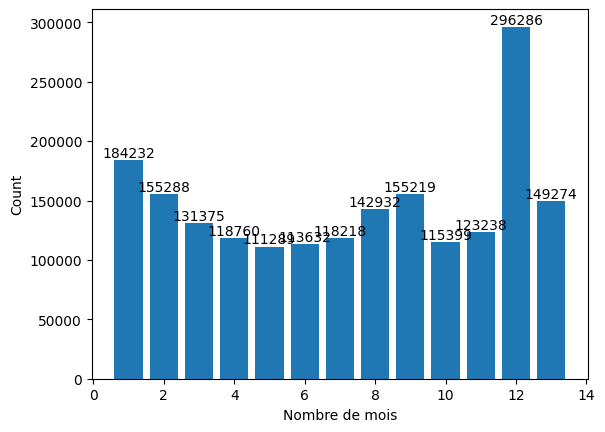

In [62]:
bars = plt.bar(correction_df.index, correction_df['Count'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Nombre de mois')
plt.ylabel('Count')
plt.show()

Méthode 2 :

In [111]:
import pandas as pd

df['month_year'] = df['DATE_ACTE_REEL'].dt.to_period('M')  # Créez une nouvelle colonne qui capture l'année et le mois

# Group by 'ID' and then list all the unique 'month_year' entries
monthly_counts = df.groupby('ID_ABONNE')['month_year'].apply(lambda x: x.unique().size)
monthly_counts


# Pour chaque ID, compte le nombre de mois uniques dans une fenêtre de 12 mois
def average_monthly_appearance(dates):
    dates = pd.to_datetime(dates).sort_values()  # Assurez-vous que les dates sont triées
    df_temp = pd.DataFrame(dates, columns=['DATE_ACTE_REEL'])
    df_temp.set_index('DATE_ACTE_REEL', inplace=True)
    df_temp['count'] = 1
    
    return df_temp['count'].rolling('365D').sum().mean()  # '365D' pour une fenêtre de 365 jours


# Appliquez cette fonction à chaque groupe d'ID
average_counts = df.groupby('ID_ABONNE')['DATE_ACTE_REEL'].apply(average_monthly_appearance)

print(average_counts)



# Graphiques

## **1 / Répartition globale de l'utilisation des services**

In [64]:
def create_distribution_plot(df, title, label = 0, value = 1, number = True):
    """
    Creates a repartition graph
    Label is the number of the label column, value the number of the value column.
    Number is True if I want to select the columns by their number 
    or False if I want to select them by their label.
    """
    plt.figure()
    if number:
        bars = plt.bar(df.iloc[:, label], df.iloc[:, value])
    else:
       bars = plt.bar(df[label], df[value])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes et alignement à droite
    plt.tight_layout()
    return


In [65]:
def rep_globale(data_path):
    df = file_to_dataframe(data_path + "repartition_canaldistrib_%.csv", ',')
    df1 = file_to_dataframe(data_path + "repartition_enseigne_%.csv", ',')
    df2 = file_to_dataframe(data_path + "repartition_formule_%.csv", ',')
    df3 = file_to_dataframe(data_path + "repartition_moypay_%.csv", ',')
    df4 = file_to_dataframe(data_path + "repartition_promo_%.csv", ',')
    df5 = file_to_dataframe(data_path + "repartition_region_%.csv", ',')

    create_distribution_plot(df4, title= 'Répartiton totale promo', label = 0, value = 1, number = True)
    create_distribution_plot(df, title= 'Répartiton totale canal', label = 0, value = 1, number = True)
    create_distribution_plot(df1, title= 'Répartiton totale enseigne', label = 0, value = 1, number = True)
    create_distribution_plot(df2, title= 'Répartiton totale formule prec', label = 0, value = 1, number = True)
    create_distribution_plot(df3, title= 'Répartiton totale moypay', label = 0, value = 1, number = True)
    create_distribution_plot(df5, title= 'Répartiton totale region', label = 0, value = 1, number = True)

    return True

True

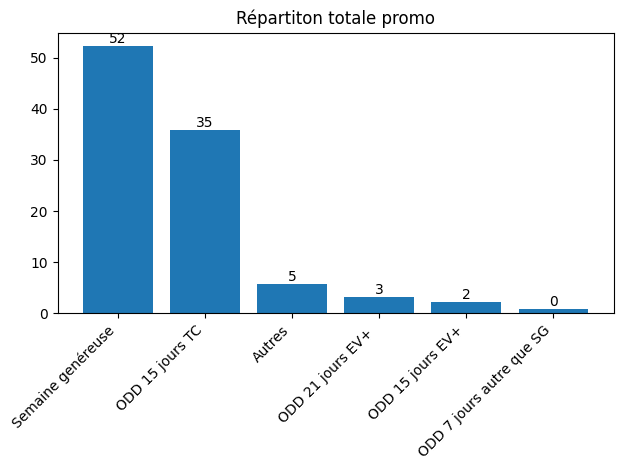

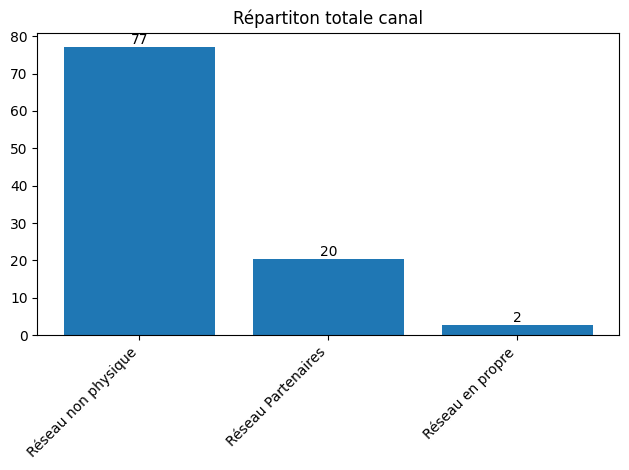

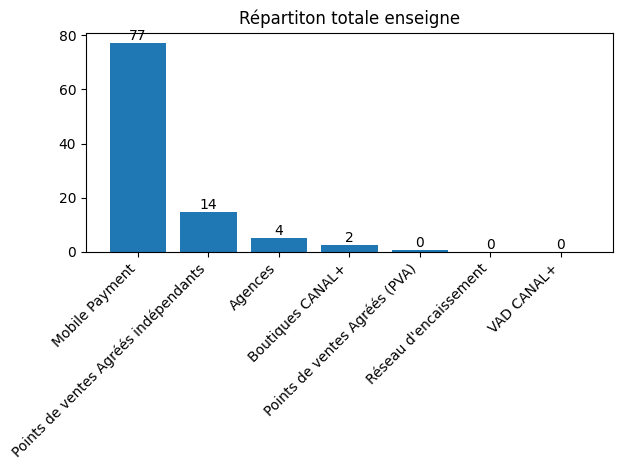

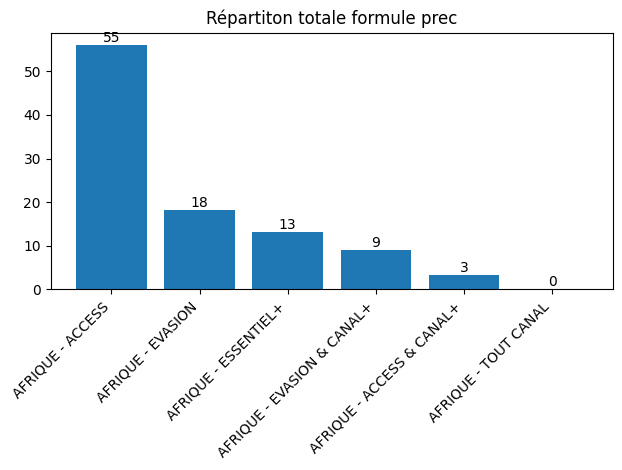

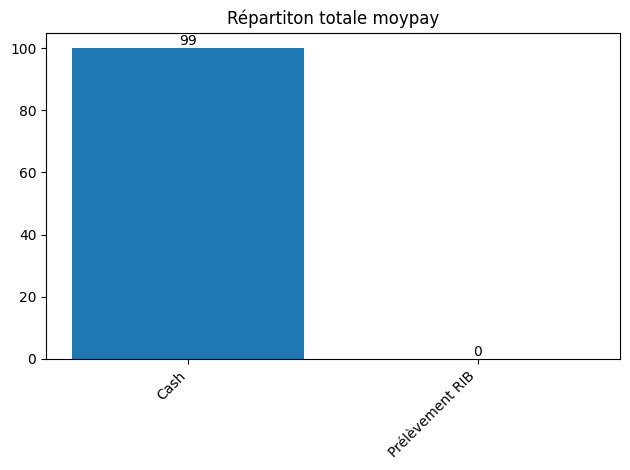

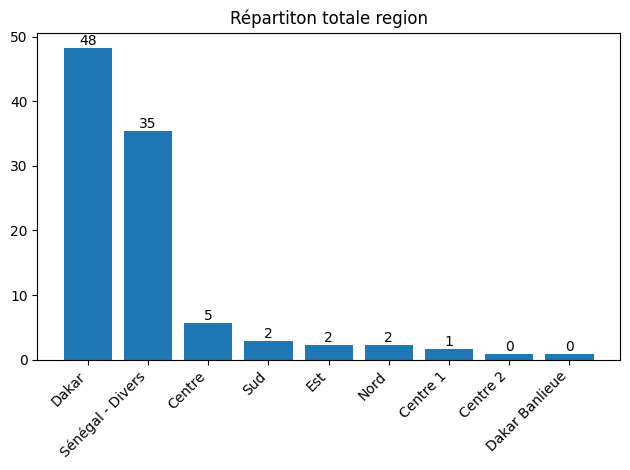

In [66]:
rep_globale(path_results_antoine)

## **2 / Répartition des services par type de promo**

In [84]:
def graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'TYPE_PROMON', through = 'DATE'):
    """
    Crée un graph à travers through de la quantité value
    et montre sa répartition selon repartion.
    """
    if through == 'DATE':
        # Convertir MONTH et YEAR en datetime pour faciliter la manipulation du temps
        #df['DATE'] = pd.to_datetime(str(df['MONTH']) + ' ' + str(df['YEAR']).astype(str))
        #df['DATE'] = pd.to_datetime(df['MONTH'].astype(str).str.cat(df['YEAR'].astype(str), sep=' '))
        df['DATE'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str), format='%m-%Y')
        #df['DATE'] = df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str).str[-2:]
        #df = df.sort_values(by='DATE')
        df['DATE'] = df['DATE'].dt.to_period('M')
        df['DATE'] = df['DATE'].dt.strftime('%y')
        df = df.sort_values(by='DATE')


    # Créer une figure 
    fig, ax = plt.subplots(1,1, figsize=(10, 8))

    bars = sns.barplot(x=through, y=value, hue=repartition, data=df, palette='muted', errorbar = None)
    for p in bars.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

    ax.set_title('Répartition de ' + value + ' par ' + repartition + ' selon ' + through)
    ax.legend(title=repartition)
       
    plt.xticks(rotation=45, ha='right') 

    return


In [85]:
def rep_services_promo(data_path):
    df = file_to_dataframe(data_path + "promo_" + "repartition_canaldistrib.csv", ',')
    df1 = file_to_dataframe(data_path + "promo_" + "repartition_enseigne.csv", ',')
    df2 = file_to_dataframe(data_path + "promo_" +"repartition_formule_prec.csv", ',')
    df3 = file_to_dataframe(data_path + "promo_" +"repartition_moypay.csv", ',')
    df4 = file_to_dataframe(data_path + "promo_" +"repartition_region.csv", ',')

    graph_repartition(df, value = 'Percentage_ID_ABONNE', repartition = 'CANAL_DISTRIB', through = 'TYPE_PROMON')
    graph_repartition(df1, value = 'Percentage_ID_ABONNE', repartition = 'ENSEIGNE', through = 'TYPE_PROMON')
    graph_repartition(df2, value = 'Percentage_ID_ABONNE', repartition = 'FORMULE_PREC', through = 'TYPE_PROMON')
    graph_repartition(df3, value = 'Percentage_ID_ABONNE', repartition = 'MOYEN_PAIEMENT', through = 'TYPE_PROMON')
    graph_repartition(df4, value = 'Percentage_ID_ABONNE', repartition = 'REGION', through = 'TYPE_PROMON')

    return True

True

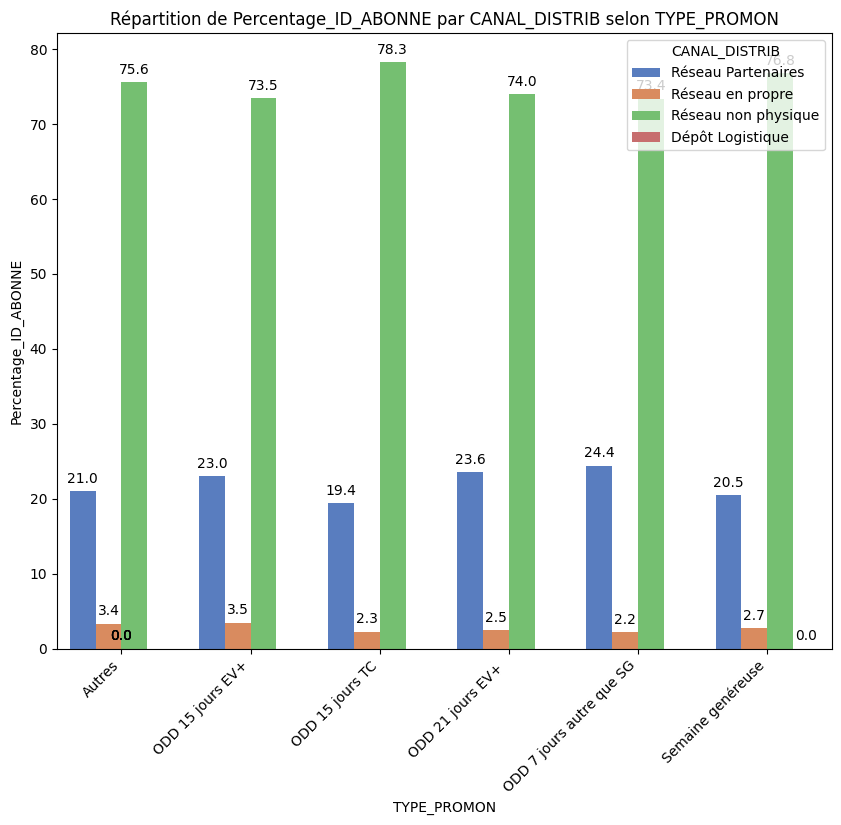

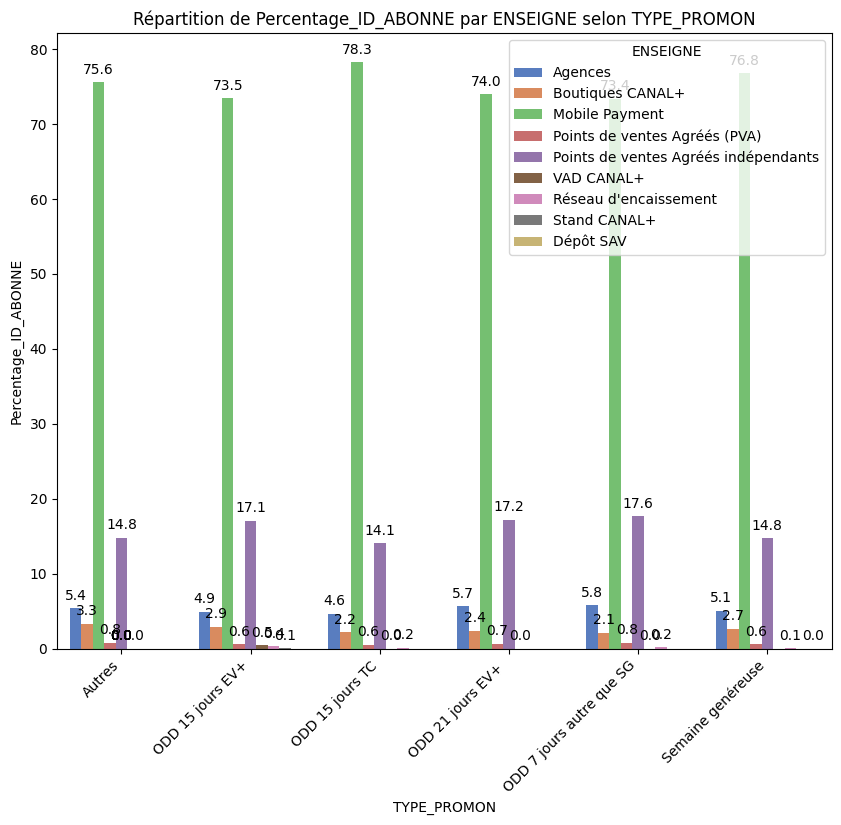

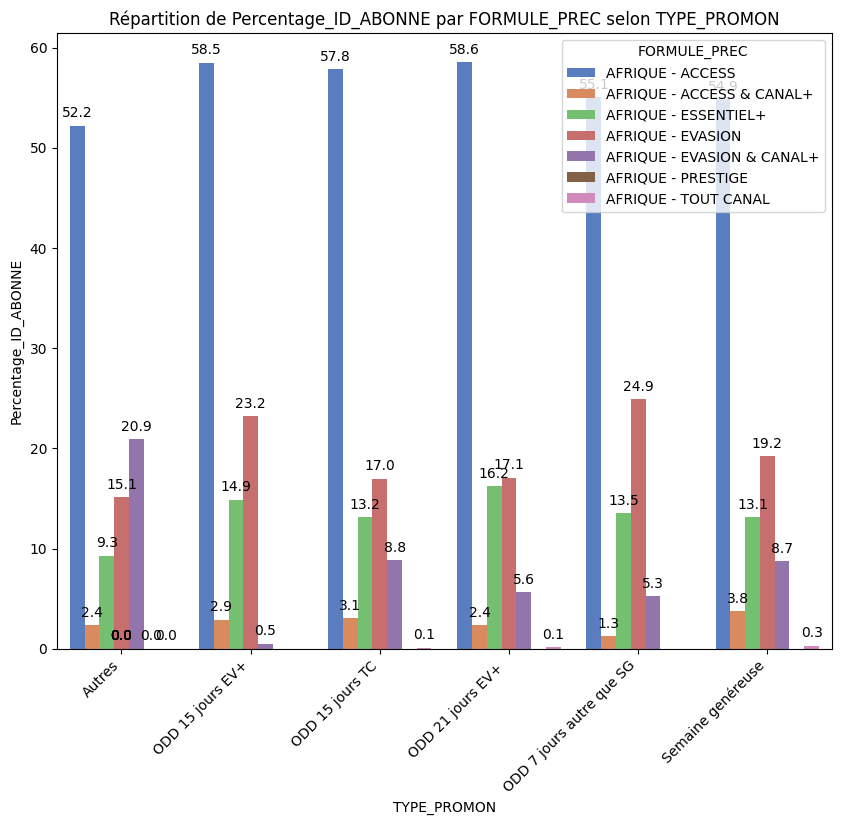

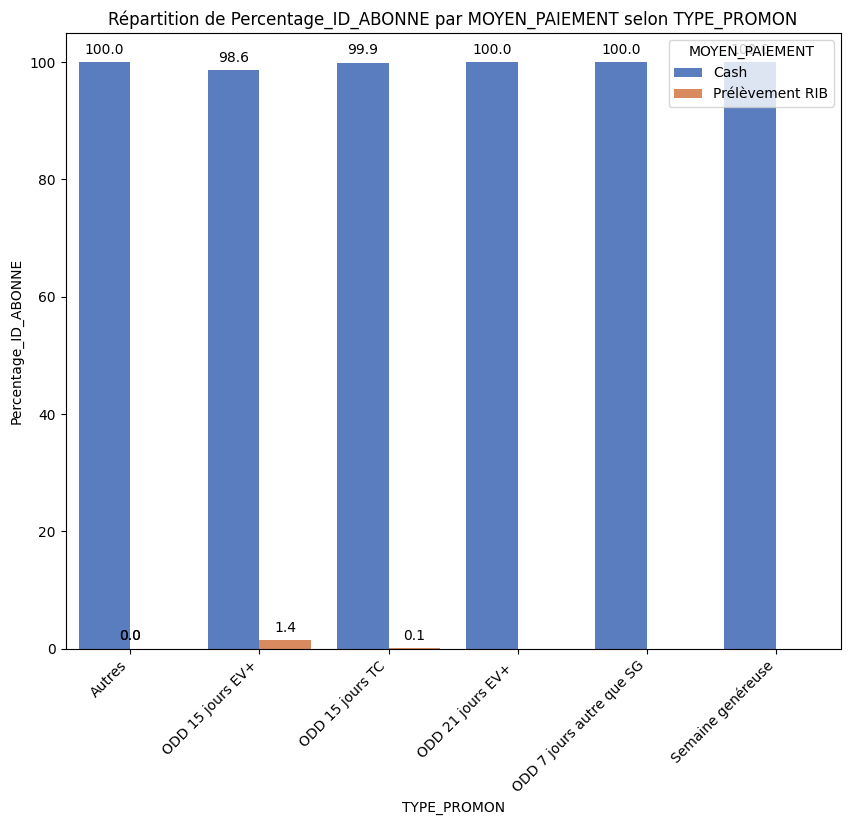

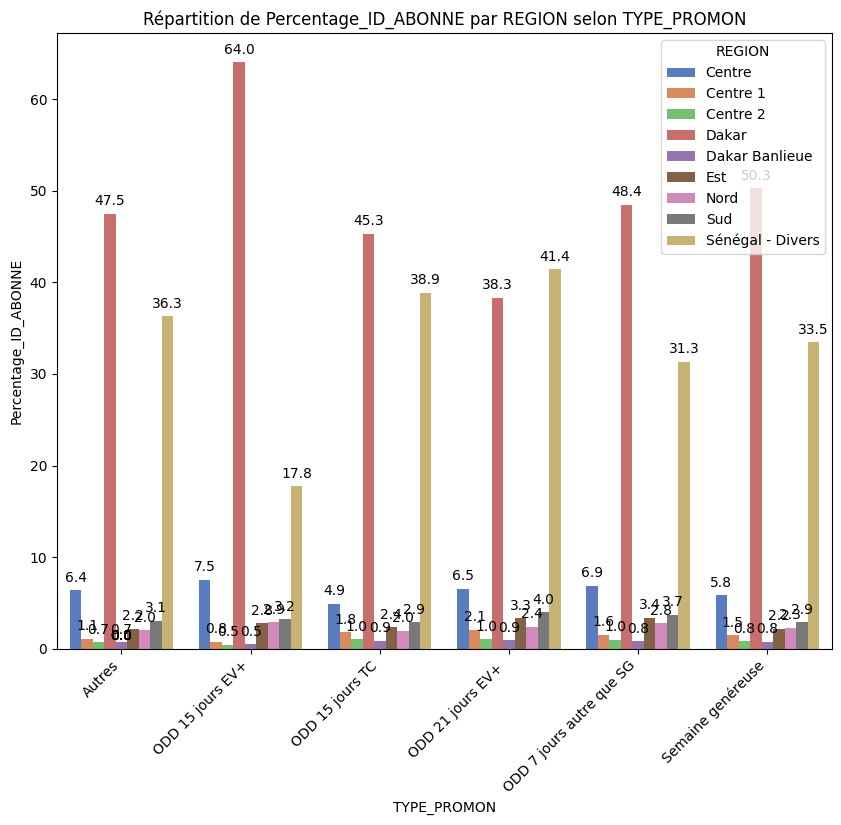

In [86]:
rep_services_promo(path_results_antoine)

## **3 / Evolution de l'utilisation des services au cours du temps**

DIfférences entre années

In [87]:
def rep_evo_secteurs_year(data_path):
    df = file_to_dataframe(data_path + "month_canaldistrib.csv", ',')
    df1 = file_to_dataframe(data_path  + "month_enseigne.csv", ',')
    df2 = file_to_dataframe(data_path + "month_formule.csv", ',')
    df3 = file_to_dataframe(data_path  + "month_moypay.csv", ',')
    df4 = file_to_dataframe(data_path  + "month_region.csv", ',')

    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'CANAL_DISTRIB', through = 'YEAR')
    graph_repartition(df1, value = 'NB_ID_ABONNE', repartition = 'ENSEIGNE', through = 'YEAR')
    graph_repartition(df2, value = 'NB_ID_ABONNE', repartition = 'FORMULE_PREC', through = 'YEAR')
    graph_repartition(df3, value = 'NB_ID_ABONNE', repartition = 'MOYEN_PAIEMENT', through = 'YEAR')
    graph_repartition(df4, value = 'NB_ID_ABONNE', repartition = 'REGION', through = 'YEAR')

    return True

True

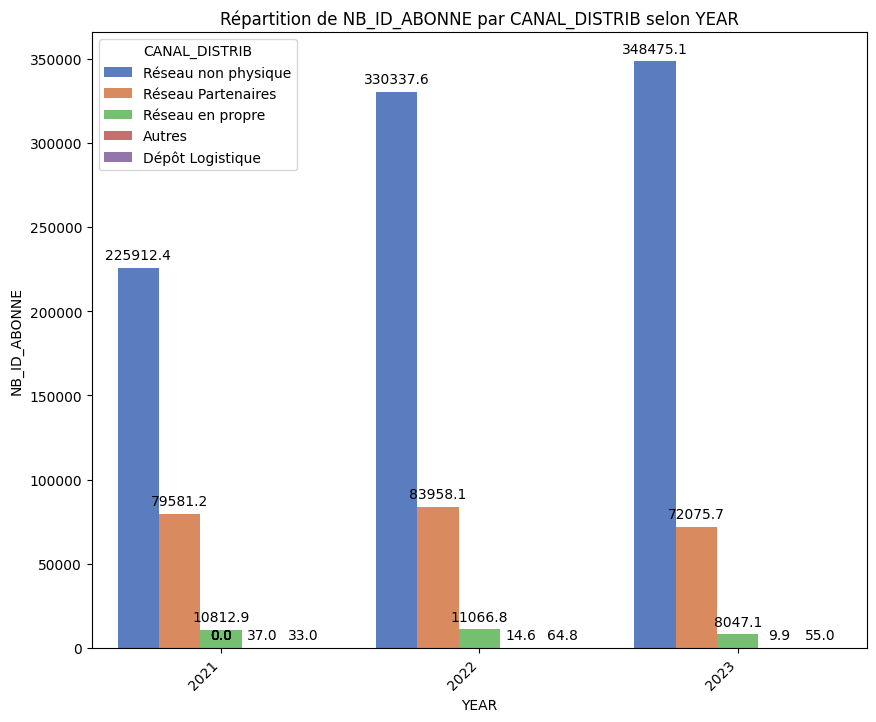

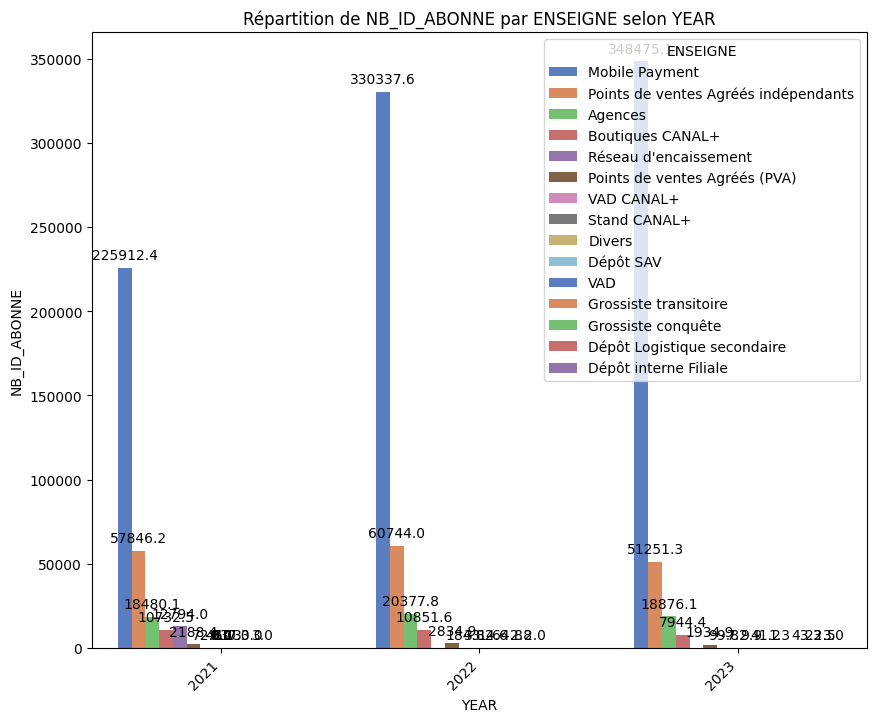

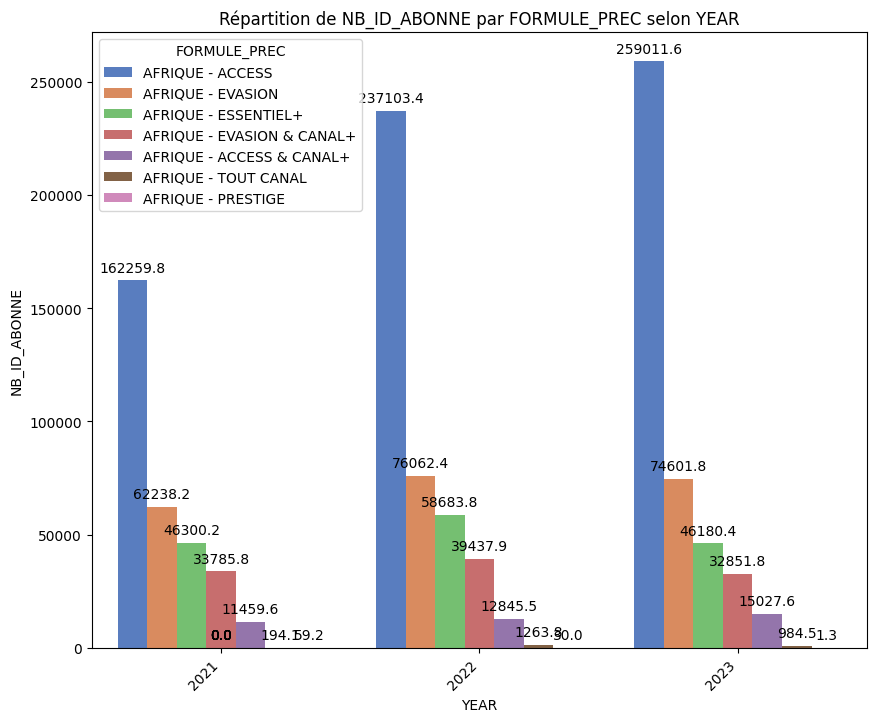

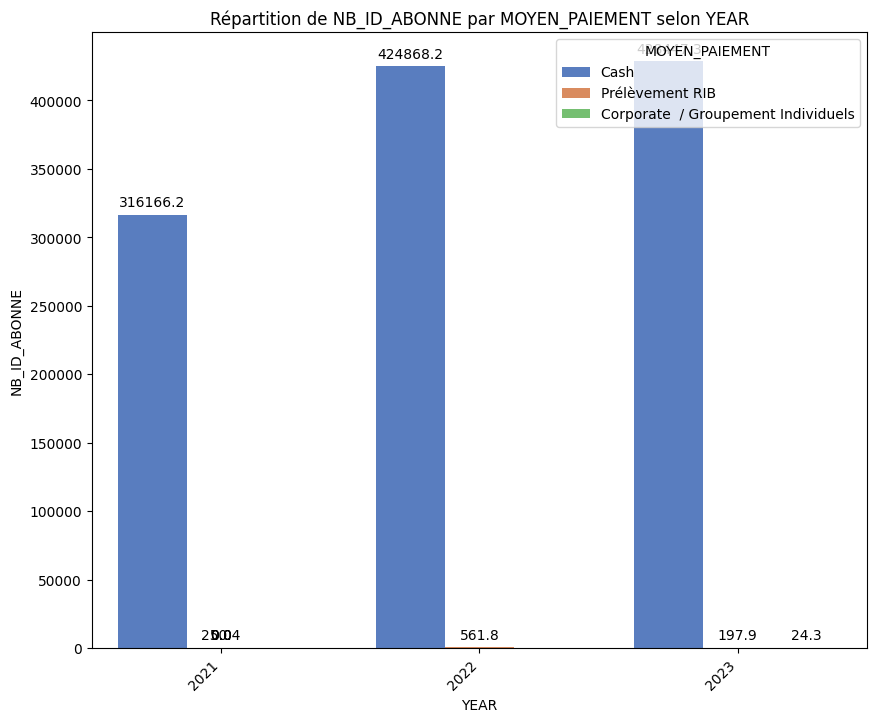

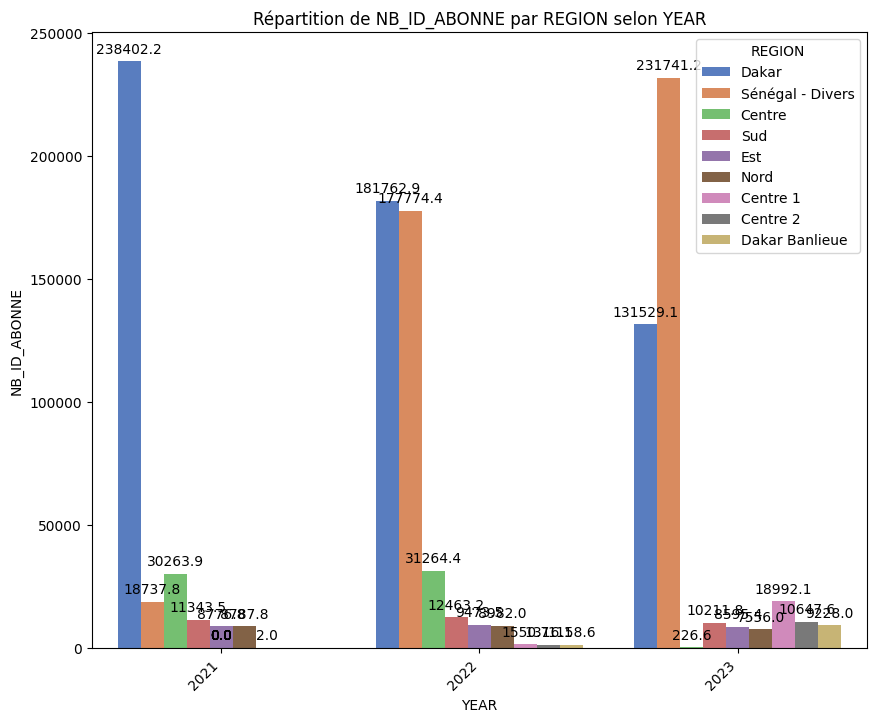

In [88]:
rep_evo_secteurs_year(path_results_antoine)

Différences entre mois 

In [89]:
def rep_evo_secteurs_month(data_path):
    df = file_to_dataframe(data_path + "month_canaldistrib.csv", ',')
    df1 = file_to_dataframe(data_path  + "month_enseigne.csv", ',')
    df2 = file_to_dataframe(data_path + "month_formule.csv", ',')
    df3 = file_to_dataframe(data_path  + "month_moypay.csv", ',')
    df4 = file_to_dataframe(data_path  + "month_region.csv", ',')

    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'CANAL_DISTRIB', through = 'MONTH')
    graph_repartition(df1, value = 'NB_ID_ABONNE', repartition = 'ENSEIGNE', through = 'MONTH')
    graph_repartition(df2, value = 'NB_ID_ABONNE', repartition = 'FORMULE_PREC', through = 'MONTH')
    graph_repartition(df3, value = 'NB_ID_ABONNE', repartition = 'MOYEN_PAIEMENT', through = 'MONTH')
    graph_repartition(df4, value = 'NB_ID_ABONNE', repartition = 'REGION', through = 'MONTH')

    return True

True

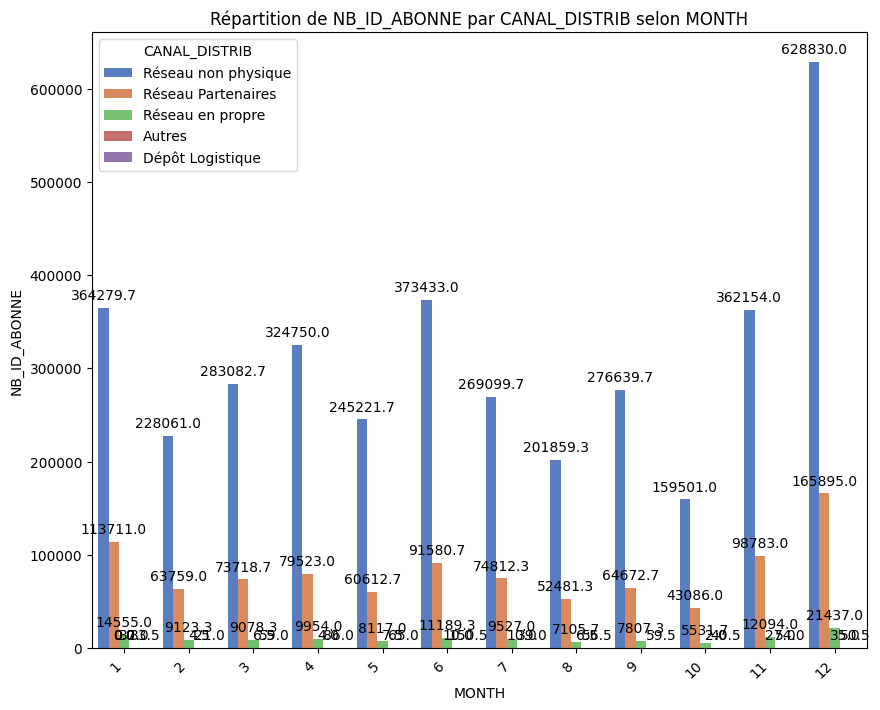

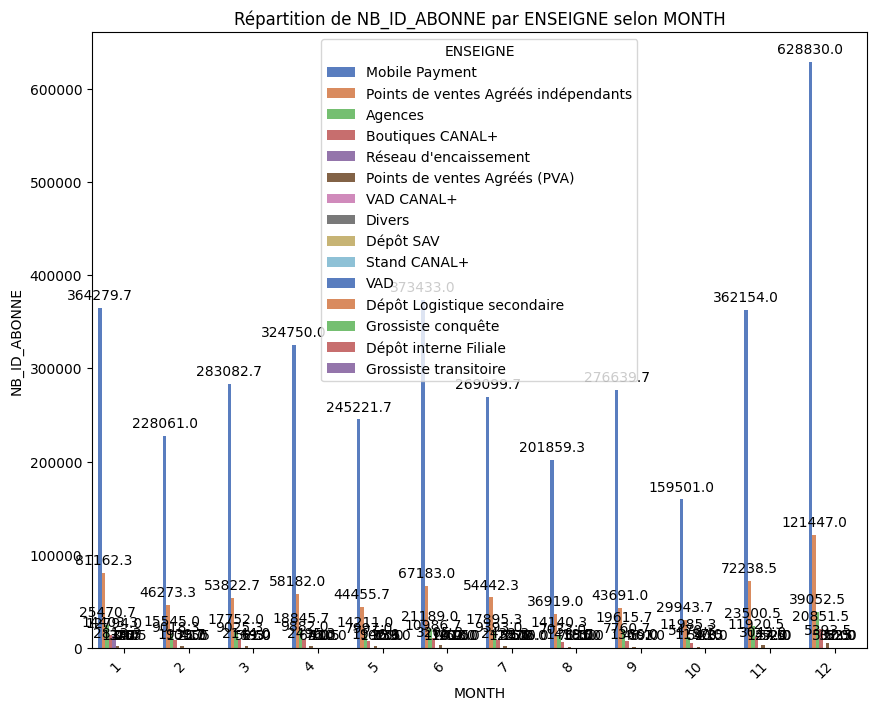

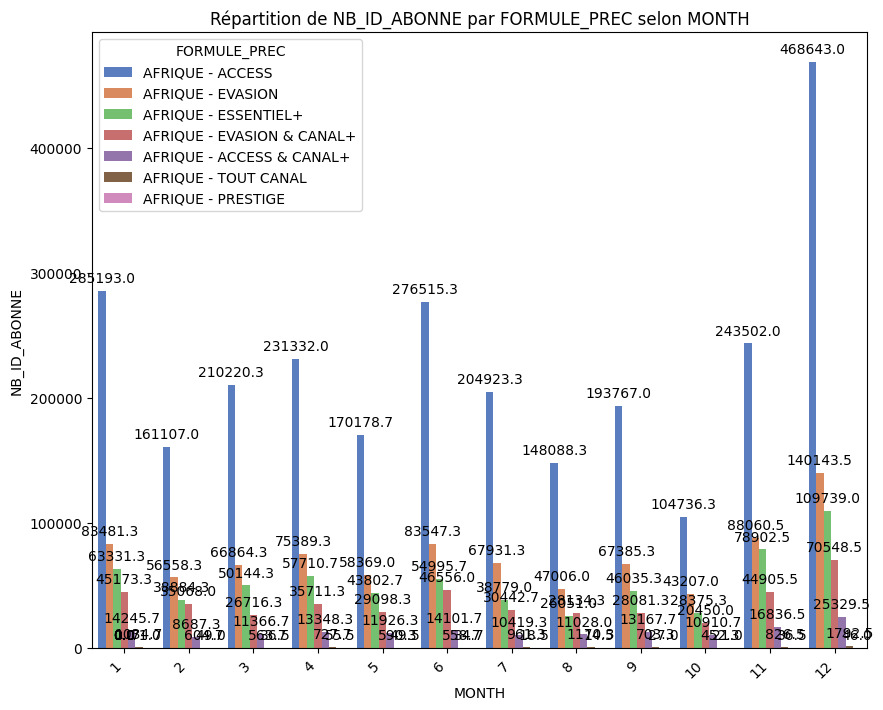

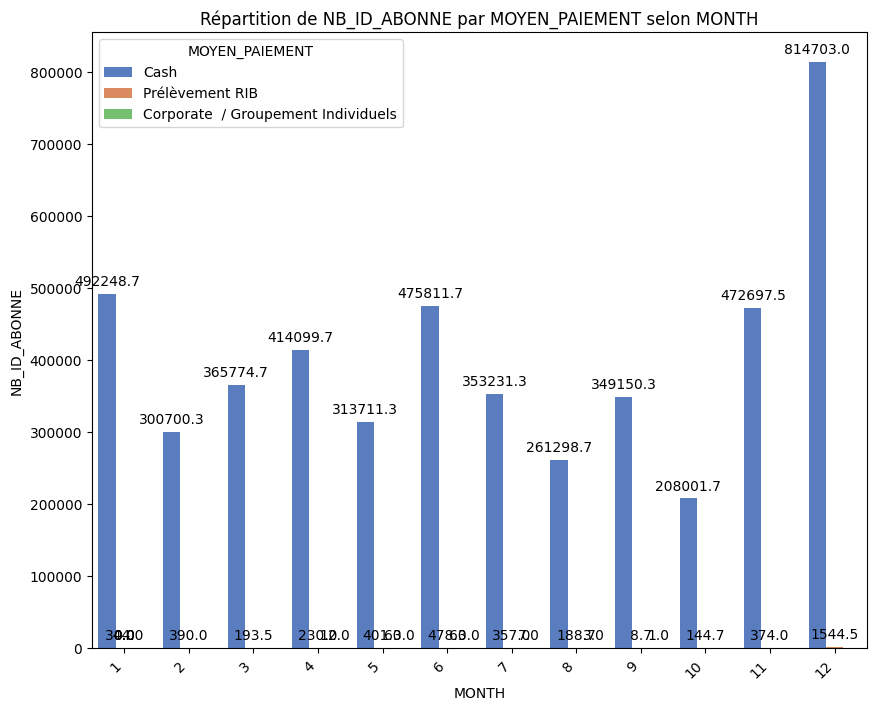

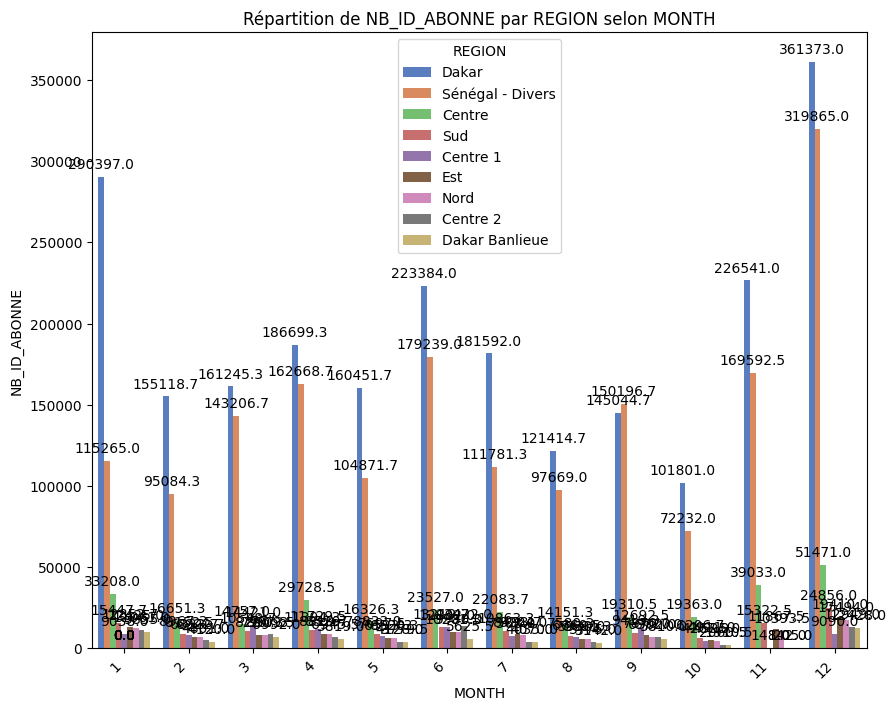

In [90]:
rep_evo_secteurs_month(path_results_antoine)

## 4 / Utilisation des promos au cours du temps

Utilisation des promos au cours des années

In [91]:
def evo_promo(data_path):

    df = file_to_dataframe(data_path + "month_promo.csv", ',')
    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'TYPE_PROMON', through = 'YEAR')
    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'TYPE_PROMON', through = 'MONTH')

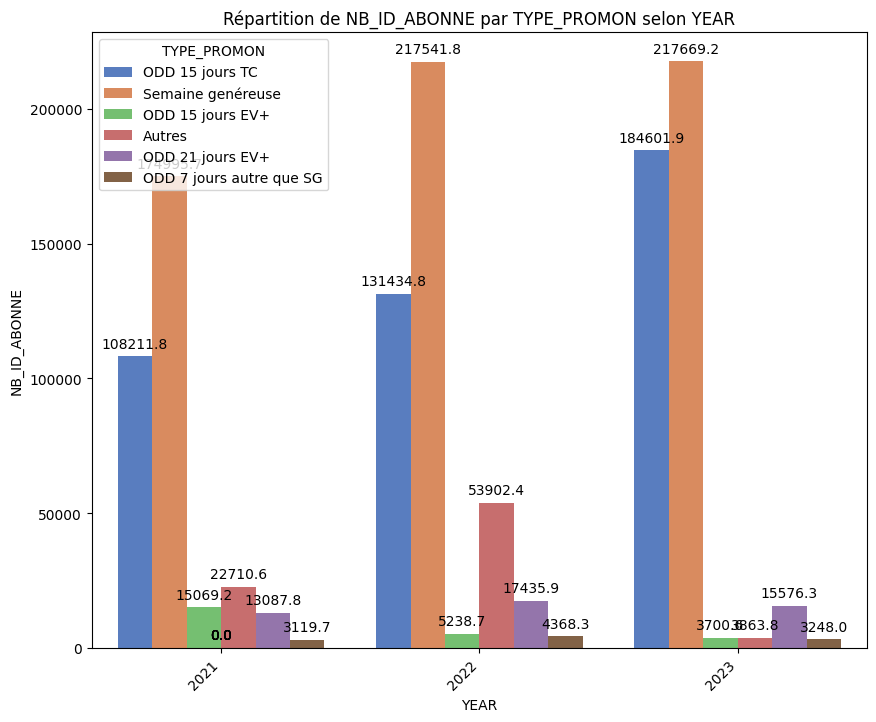

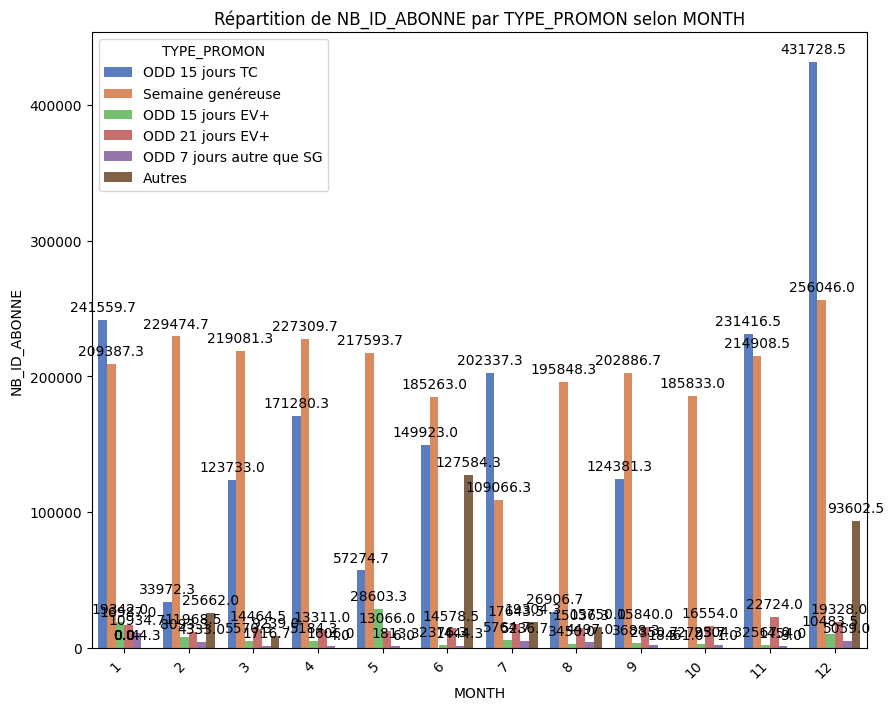

In [92]:
evo_promo(path_results_antoine)

## **5 / Délais de réabonnements**

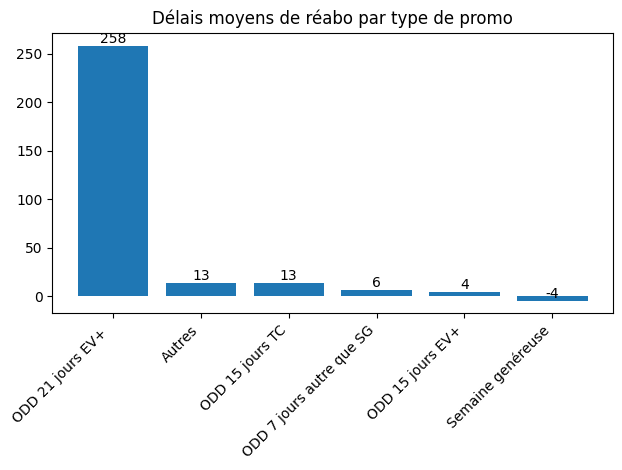

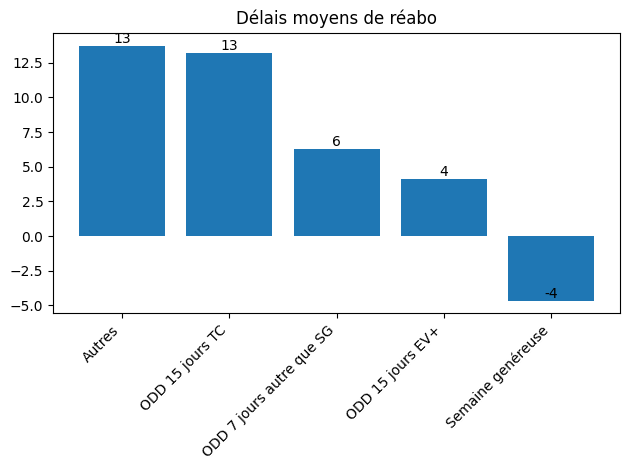

In [93]:
def delai_reabo(data_path):
    df = file_to_dataframe(data_path + "df_mean_time_reabo_promos.csv", ',')
    create_distribution_plot(df, title = 'Délais moyens de réabo par type de promo', label = 0, value = 1, number = True)
    df = df.drop(df.index[0])
    create_distribution_plot(df, title = 'Délais moyens de réabo', label = 0, value = 1, number = True)

delai_reabo(path_antoine)
